<a href="https://colab.research.google.com/github/Wandafebrr/PCVK_2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##MODUL 5 – Operasi Aritmatika dan Logika - Gamma Correction, Image Depth, PSNR, Average Denoising, Image Masking

In [24]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###**Tugas Praktikum**

**1. Membuat gamma correction**

 Gamma Correction pada Citra 
-----------------------------
Masukkan nilai Gamma: 3


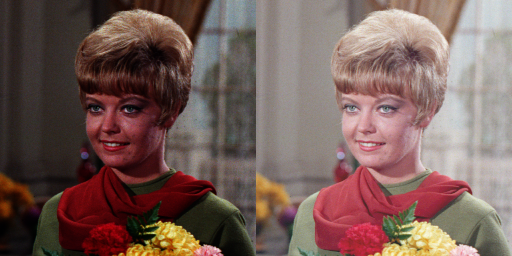

In [6]:
print(' Gamma Correction pada Citra ')
print('-----------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/pcvk/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c]=np.clip(255 * pow (original[y,x,c] / 255, (1/gamma)), 0,255)

final_frame = cv.hconcat((original,gamma_image))
cv2_imshow(final_frame)

**2. Membuat Simulasi Image Depth**

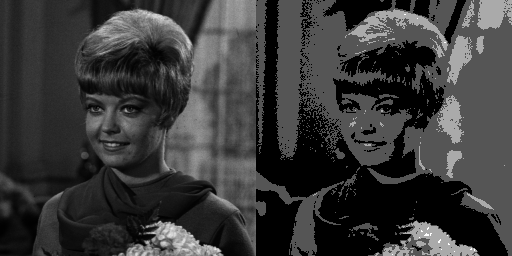

In [17]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/pcvk/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    depth_image[y, x] = np.clip(np.round(original[y, x] / level) * level, 0, 255)

final_frame = cv.hconcat((original, depth_image))
cv2_imshow(final_frame)


**3. Membuat modul Averange Denoising**

Error: Hanya 1 citra noise yang tersedia, tidak cukup untuk denoising 1000 citra.


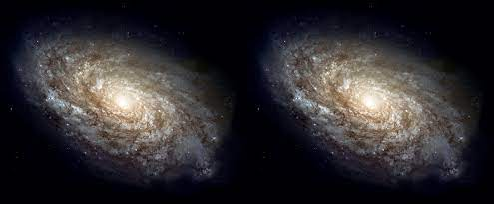

In [40]:
import glob
import cv2
from math import log10, sqrt



def PNSR(original,compressed):
  mse = np.mean((original - compressed) ** 2)
  if(mse==0):
    return 100
  max_pixel = 255.0
  psnr = 20 * log10(max_pixel / sqrt(mse))
  return psnr

original = cv2.imread('/content/drive/MyDrive/pcvk/galaxy.jpeg')

cv_img = []
for img in glob.glob('/content/drive/MyDrive/pcvk/galaxy.jpeg'):
  n= cv2.imread(img)
  cv_img.append(n)
if len(cv_img) < img_amt:
    print(f"Error: Hanya {len(cv_img)} citra noise yang tersedia, tidak cukup untuk denoising {img_amt} citra.")
else:
  denoising_avg = np.mean(cv_img[:img_amt], axis=0).astype(np.uint8)
  value = PSNR(original, denoising_avg)
  print(f"Nilai PSNR: {value} dB")

final_frame = cv2.hconcat((original, denoising_avg))
cv2_imshow(final_frame)

In [46]:
# 1. Jumlah Citra di Average - 5

import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/pcvk/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/pcvk/Pengolahan Citra dan Komputer Vision/Images/noises*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 4
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
      return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

IndexError: ignored

**4. Image Masking**

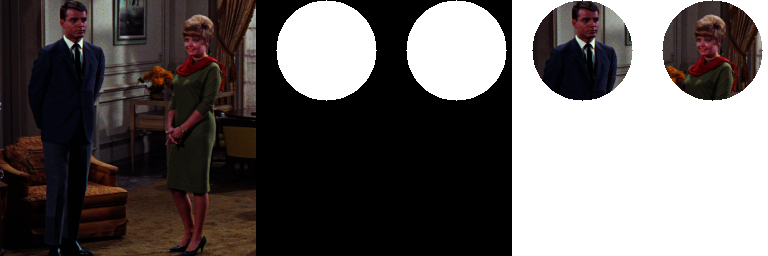

In [62]:
ori = cv.imread('/content/drive/MyDrive/pcvk/Pengolahan Citra dan Komputer Vision/Images/couple.tiff')

mask = np.zeros(ori.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255, 255, 255), -1)

mask2 = np.zeros(ori.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (200, 50), 50, (255, 255, 255), -1)

final_mask = ori & mask & mask2
final_mask [mask==0] = 255

final_frame = cv.hconcat((ori, mask, final_mask))
cv2_imshow(final_frame)

Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.
Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.
<br>
**operator OR**

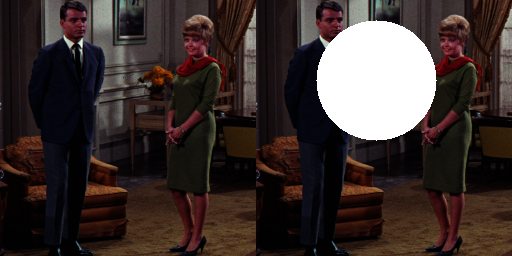

In [77]:
ori = cv.imread('/content/drive/MyDrive/pcvk/Pengolahan Citra dan Komputer Vision/Images/couple.tiff')

mask = np.zeros(ori.shape, dtype=np.uint8)
mask = cv.circle(mask, (120, 80), 60, (255, 255, 255), -1)

final_mask = ori | mask

final_frame = cv.hconcat((ori, final_mask))
cv2_imshow(final_frame)

**Operator NOT**

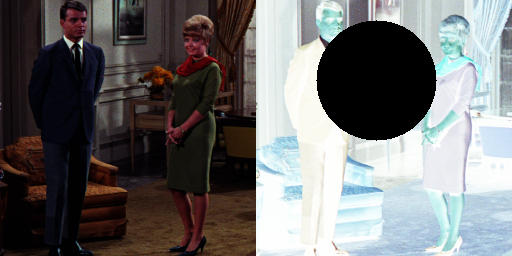

In [83]:
ori = cv.imread('/content/drive/MyDrive/pcvk/Pengolahan Citra dan Komputer Vision/Images/couple.tiff')

mask = np.zeros(ori.shape, dtype=np.uint8)
mask = cv.circle(mask, (120, 80), 60, (255, 255, 255), -1)

final_mask = ~ori & ~mask

final_frame = cv.hconcat((ori, final_mask))
cv2_imshow(final_frame)

**Operator NAND**

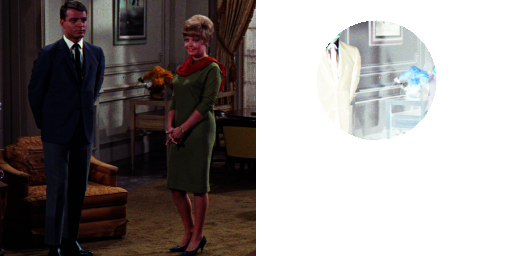

In [84]:
ori = cv.imread('/content/drive/MyDrive/pcvk/Pengolahan Citra dan Komputer Vision/Images/couple.tiff')

mask = np.zeros(ori.shape, dtype=np.uint8)
mask = cv.circle(mask, (120, 80), 60, (255, 255, 255), -1)

final_mask = cv2.bitwise_not(ori & mask)

final_frame = cv.hconcat((ori, final_mask))
cv2_imshow(final_frame)

**Operator XOR**

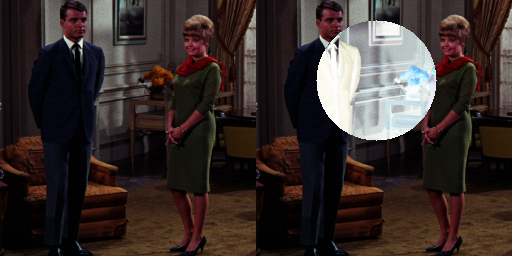

In [85]:
ori = cv.imread('/content/drive/MyDrive/pcvk/Pengolahan Citra dan Komputer Vision/Images/couple.tiff')

mask = np.zeros(ori.shape, dtype=np.uint8)
mask = cv.circle(mask, (120, 80), 60, (255, 255, 255), -1)

final_mask = cv2.bitwise_xor(ori,mask)

final_frame = cv.hconcat((ori, final_mask))
cv2_imshow(final_frame)

Hasil Analisa:
